## Tema C - Augmented Poster

Dalam tugas ini, kalian akan membuat aplikasi sederhana augmented reality 2D. Idenya adalah menempelkan sebuah gambar (misalnya logo, cover buku, atau poster buatan kalian) ke permukaan planar dalam foto, sehingga terlihat seolah-olah benar-benar berada di dunia nyata.
Transformasi ini dilakukan menggunakan homography untuk memetakan citra sumber ke bidang target.

### Langkah Tugas
1.   Ambil Foto Permukaan Planar, misalnya meja, sampul buku, lantai ubin, atau papan tulis.
2.   Tentukan area planar pada foto yang akan ditempeli gambar (misalnya 4 titik sudut sebuah buku di meja).
3.   Siapkan Gambar Sumber dengan menggunakan gambar logo, poster, atau ilustrasi pilihan kalian.
4.   Hitung Matriks Homography 𝐻, dari 4 titik sumber (sudut gambar poster) ke 4 titik target (bidang dalam foto).
5.   Warp dan Overlay Gambar
     *   Gunakan `cv2.warpPerspective` untuk memetakan gambar ke permukaan target.
     *   Gabungkan hasil warp dengan foto asli sehingga gambar seolah tertempel.
6.   Eksperimen Interpolasi
     *   Lakukan warping dengan Nearest Neighbour dan Bilinear.
     *   Bandingkan hasil ketajaman dan kehalusan.

### Output yang Dikumpulkan
1.   Foto asli dengan 4 titik target ditandai.
2.   Gambar hasil augmentasi (poster tertempel di permukaan).
3.   Perbandingan hasil interpolasi (nearest vs bilinear).
4.   Analisis singkat: apakah gambar terlihat natural, apa kendalanya.

### Catatan
*   Pilih permukaan planar dengan jelas (misalnya meja datar atau sampul buku).
*   Warna dan pencahayaan mungkin berbeda, tetapi fokus utama adalah transformasi geometrinya.
*   Kalian boleh berkreasi (misalnya menempelkan meme/cover film ke papan tulis).

# Import Library
Disini kita mengimport library yang kita butuhkan, open cv untuk pemrosesan gambar, NumPy untuk operasi numerik, dan matplotlib untuk menampilkan gambar.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Memuat gambar
Disini kita membuat folder Gambar yang memuat gambar yang akan kita gunakan

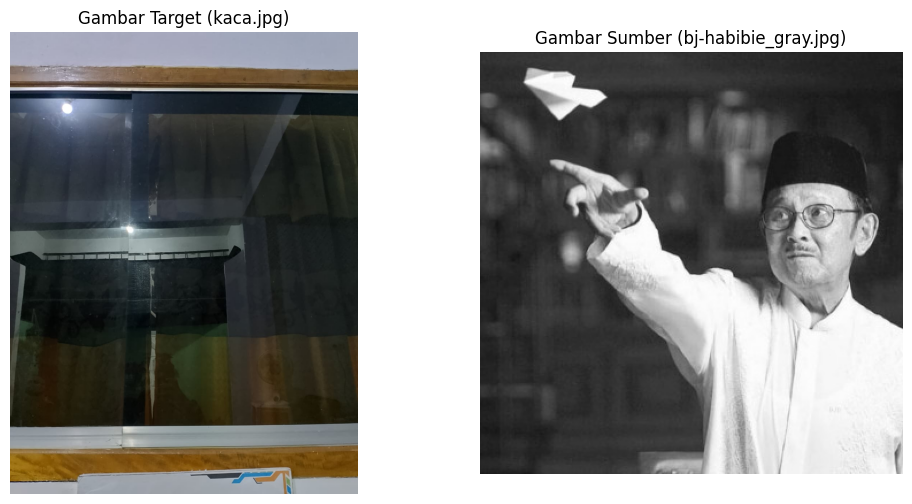

Ukuran Gambar Target: (1280, 963, 3)
Ukuran Gambar Sumber: (367, 368, 3)


In [ ]:
path_target = 'Gambar/kaca.jpg'
path_sumber = 'Gambar/bj-habibie_gray.jpg'

img_target = cv2.imread(path_target)
img_sumber = cv2.imread(path_sumber)

img_target_rgb = cv2.cvtColor(img_target, cv2.COLOR_BGR2RGB)
img_sumber_rgb = cv2.cvtColor(img_sumber, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Gambar Target (kaca.jpg)')
plt.imshow(img_target_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Gambar Sumber (bj-habibie_gray.jpg)')
plt.imshow(img_sumber_rgb)
plt.axis('off')

plt.show()

tinggi_sumber, lebar_sumber, _ = img_sumber.shape
print(f"Ukuran Gambar Target: {img_target.shape}")
print(f"Ukuran Gambar Sumber: {img_sumber.shape}")

# Menentukan 4 titik

1. Menentukan titik sumber dengan menggunakan array NumPy yang berisi koordinat
2. Menentukan titik target yang dimana terdapat array yang berisi 4 koordinat pada gambar target (kaca.jpg)
3. Visualisasi titik target untuk mengetahui lokasi 4 titik tersebut

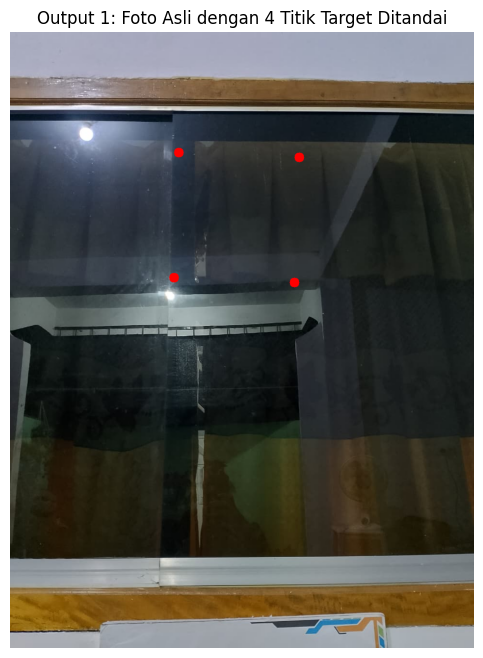

Titik Sumber:
 [[  0.   0.]
 [367.   0.]
 [367. 366.]
 [  0. 366.]]

Titik Target:
 [[350. 250.]
 [600. 260.]
 [590. 520.]
 [340. 510.]]


In [ ]:
pts_sumber = np.array([
    [0, 0],
    [lebar_sumber - 1, 0],
    [lebar_sumber - 1, tinggi_sumber - 1],
    [0, tinggi_sumber - 1]
], dtype='float32')

pts_target = np.array([
    [350, 250],
    [600, 260],
    [590, 520],
    [340, 510]
], dtype='float32')


img_target_dengan_titik = img_target_rgb.copy()
for point in pts_target:
    x, y = int(point[0]), int(point[1])
    # Gambar lingkaran merah pada setiap titik
    cv2.circle(img_target_dengan_titik, (x, y), 10, (255, 0, 0), -1)

plt.figure(figsize=(8, 8))
plt.title('Output 1: Foto Asli dengan 4 Titik Target Ditandai')
plt.imshow(img_target_dengan_titik)
plt.axis('off')
plt.show()

print("Titik Sumber:\n", pts_sumber)
print("\nTitik Target:\n", pts_target)

# Menghitung matriks homography
menghitung dengan 4 titik yang sudah didefinisikan untuk menghitung matriks homography. Matriks ini kemudian digunakan oleh cv2.warpPerspective untuk mendistorsi gambar sumber agar pas dengan perspektif target

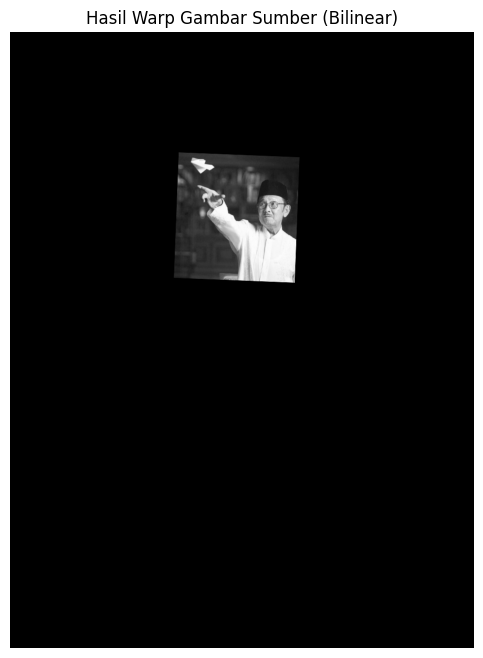

In [ ]:
H, status = cv2.findHomography(pts_sumber, pts_target)

tinggi_target, lebar_target, _ = img_target.shape

warped_img = cv2.warpPerspective(img_sumber, H, (lebar_target, tinggi_target))

plt.figure(figsize=(8, 8))
plt.title('Hasil Warp Gambar Sumber (Bilinear)')
plt.imshow(cv2.cvtColor(warped_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Menggabungkan gambar hasil wrap dengan gambar asli
Pada bagian ini kita menempelkan gambar yang sudah di-wrap ke gambar target  

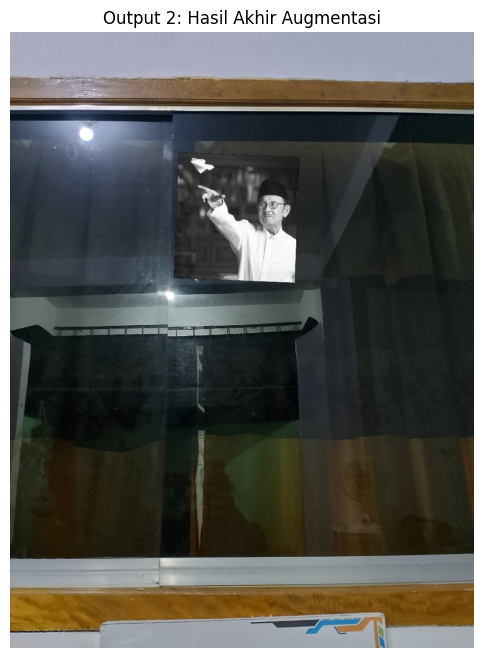

In [ ]:
mask = cv2.cvtColor(warped_img, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)

img_target_berlubang = cv2.bitwise_and(img_target, img_target, mask=cv2.bitwise_not(mask))

hasil_augmentasi = cv2.add(img_target_berlubang, warped_img)

plt.figure(figsize=(8, 8))
plt.title('Output 2: Hasil Akhir Augmentasi')
plt.imshow(cv2.cvtColor(hasil_augmentasi, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Perbandingan Interpolasi
Kita membandingkan hasil wraping menggunakan interpolasi Nearest Neighbour dan Bilinear

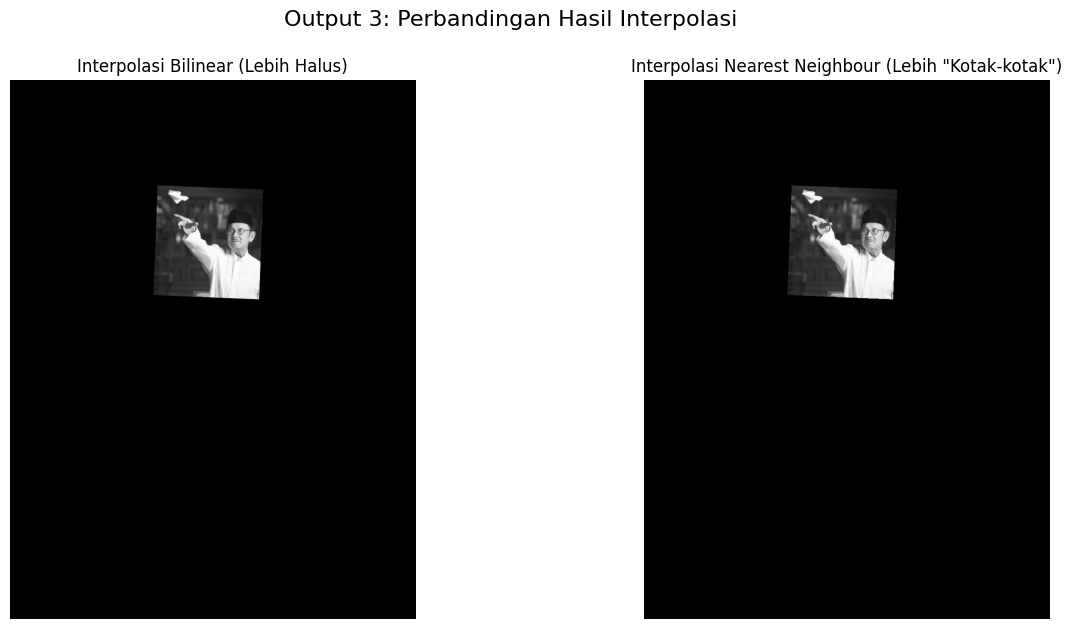

Perhatikan bagian tepi gambar yang miring. Hasil 'Nearest Neighbour' akan terlihat bergerigi atau patah-patah, sedangkan 'Bilinear' akan terlihat lebih mulus karena menghitung rata-rata piksel tetangga.


In [ ]:
warped_bilinear = cv2.warpPerspective(img_sumber, H, (lebar_target, tinggi_target), flags=cv2.INTER_LINEAR)
warped_nearest = cv2.warpPerspective(img_sumber, H, (lebar_target, tinggi_target), flags=cv2.INTER_NEAREST)


plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.title('Interpolasi Bilinear (Lebih Halus)')
plt.imshow(cv2.cvtColor(warped_bilinear, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Interpolasi Nearest Neighbour (Lebih "Kotak-kotak")')
plt.imshow(cv2.cvtColor(warped_nearest, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.suptitle('Output 3: Perbandingan Hasil Interpolasi', fontsize=16)
plt.show()

print("Pada bagian tepi gambar yang miring. Hasil 'Nearest Neighbour' akan terlihat bergerigi atau patah-patah, sedangkan 'Bilinear' akan terlihat lebih mulus karena menghitung rata-rata piksel tetangga.")